In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Analysis_Python_Files.MatplotlibPlotters as mp
from misc import reportProgress
from scipy.ndimage.filters import gaussian_filter
from misc import round_sig_str as round_sig_str
import misc
import blurring_Functions as bf
import MarksConstants as mc
from importlib import reload
import Analysis_Python_Files.AnalysisHelpers as ah

### A few parameters

In [2]:
numPix = 64
p0=int(numPix/2)
zTotalSize = 10e-6 # Not sure about the origin of this number--it's also in bf
zStep = 1
numZPoints = numPix

#### Define the Gaussian distribution of the delta function along the z-axis. It should approximate the atom distribution using the axial trap frequency and expansion time.

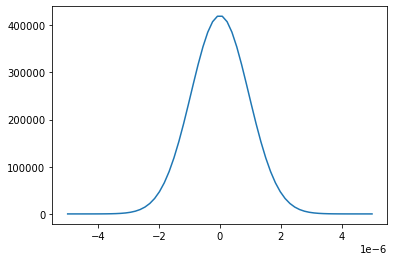

In [3]:
z_atomPlane = np.linspace(-zTotalSize/2, zTotalSize/2, numPix)
def zGaussian(z_atomPlane):
    sigma_x0 = np.sqrt(mc.hbar/(mc.Rb87_M*2*np.pi*1.5e3))/np.sqrt(2) 
    sigma_v = np.sqrt(mc.hbar*2*np.pi*1.5e3/mc.Rb87_M)/np.sqrt(2)
    sigma  = np.sqrt(sigma_v**2*(0.5e-3)**2 + sigma_x0**2)
    #print(sigma)
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(z_atomPlane)**2/(2*sigma**2))

plt.plot(z_atomPlane, zGaussian(z_atomPlane))

### Create 3D object with a single bright pixel in the center to approximate a trapped atom

(64, 64, 64)


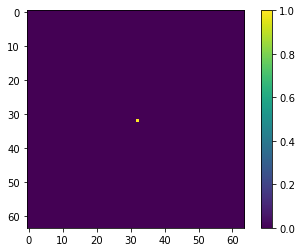

In [21]:
delta3D = np.zeros((numPix,numPix,numPix))
delta3D[p0,p0,p0] = 1


plt.imshow(delta3D[:,:,32])
plt.colorbar()
print(delta3D.shape)

### Create 3D object with a single bright pixel in the center (z-axis) weighted by the Gaussian

(64, 64, 64)


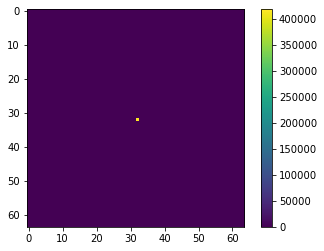

In [14]:
delta3D = np.zeros((numPix,numPix,numPix))


for i, z_atomPoint in enumerate(z_atomPlane):
    delta3D[p0,p0,i]=zGaussian(z_atomPoint)

plt.imshow(delta3D[:,:,32])
plt.colorbar()
print(delta3D.shape)


### Now blur the delta function

In [15]:
reload(bf)

<module 'blurring_Functions' from 'C:\\Users\\wdwor\\Documents\\Simulation\\blurring_Functions.py'>

(64, 64)


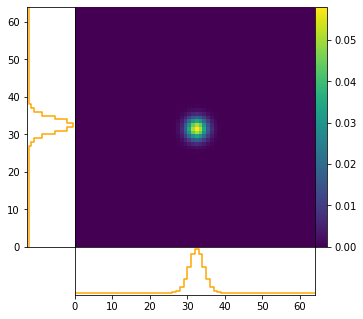

In [22]:
blurredDelta = bf.XYZ_Blur(delta3D, objectXYTotalSize = 10e-6, numPix = numPix)
fig, ax = plt.subplots()
mp.fancyImshow(fig, ax, blurredDelta)
#plt.colorbar()
print(blurredDelta.shape)


### Calculate sigma via 2D Gaussian fit 

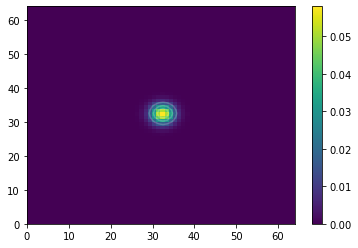

In [23]:
fittedWvftn = ah.fitPic(blurredDelta)

In [24]:
extractedSigmax = fittedWvftn[1][3]
print('sigma_x =', extractedSigmax)
extractedSigmay = fittedWvftn[1][4]
print('sigma_y =', extractedSigmay)

sigmaxy = np.sqrt((extractedSigmax**2) + (extractedSigmay**2))/np.sqrt(2)
print('sigma_xy =', sigmaxy)

uncertx = fittedWvftn[2][3]
uncerty = fittedWvftn[2][4]
uncertxy = sigmaxy*np.sqrt(((uncertx/extractedSigmax)**2) + ((uncerty/extractedSigmax)**2))/np.sqrt(2)
print('delta_xy =', uncertxy)

sigma_x = 1.9723185267247332
sigma_y = 1.972318526724733
sigma_xy = 1.9723185267247332
delta_xy = 3.6090755804661516e-17


In [25]:
objectXYTotalSize = 10e-6
atomPlane_PixSpace = objectXYTotalSize/numPix
print(atomPlane_PixSpace) 
#output_PixSpace = atomPlane_PixSpace*magnification
#effectiveAtomPlane_spacing = output_PixSpace/magnification

1.5625e-07


In [26]:
# real units!
real_sigma = sigmaxy*atomPlane_PixSpace
print(real_sigma)

3.081747698007396e-07


In [35]:
print(np.sqrt(8.9e-7**2+6.565e-7**2)/np.sqrt(2)/2)

3.910070731457425e-07


In [ ]:
4.087406002593963e-07
4.013860744497903e-07

In [43]:
fsill = 0.0156
fimg = 1
d = 0.3048 #distance in meters between two lenses
wo1 = 6e-7 #From calculation of expected diffraction size.
Si2BC = 1
So1BC = 0.0156
lamb = 7.8e-7

def geoOpt(So1_offset, wo1):
    So1 = fsill + So1_offset

    Si1 = -(fsill*So1)/(fsill-So1)
    So2 = d-Si1
    Si2 = -(fimg*So2)/(fimg-So2)   

    mTot = (Si1*Si2)/(So1*So2)
    wi2 = np.abs(wo1*mTot)
    dcam = 1-Si2
    zr = (np.pi/lamb)*wi2**2
    #print(wi2, dcam)

    return wi2*np.sqrt(1+(dcam/zr)**2)/2
    

<ipython-input-43-b35d48cf7039>:12: RuntimeWarning: divide by zero encountered in true_divide
  Si1 = -(fsill*So1)/(fsill-So1)
<ipython-input-43-b35d48cf7039>:14: RuntimeWarning: invalid value encountered in true_divide
  Si2 = -(fimg*So2)/(fimg-So2)


0.9446822643377774


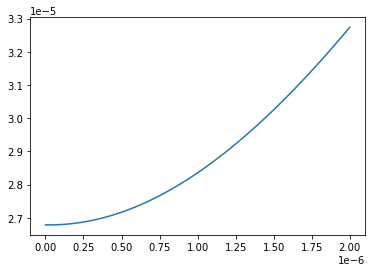

In [46]:
offsets = np.linspace(0, 2e-6, 100000)
plt.plot(offsets, geoOpt(offsets, 8.3575e-7))
print(geoOpt(1e-9, 8.3575e-7)/geoOpt(1e-6, 8.3575e-7))
#print(geoOpt(1e-6, 8.3575e-7))

In [34]:
print(minBlurx/2)

1.923071763570629e-05 1.923071763570629e-05


In [30]:
print(minBlurx/2, minBlury/2)

3.269799241871401e-05 3.269799241871401e-05
